In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torchvision
import math
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
import seaborn as sns

In [3]:
df = pd.read_excel('data_3nm.xlsx')

In [4]:
len(df.columns) - 11

1417

<Axes: >

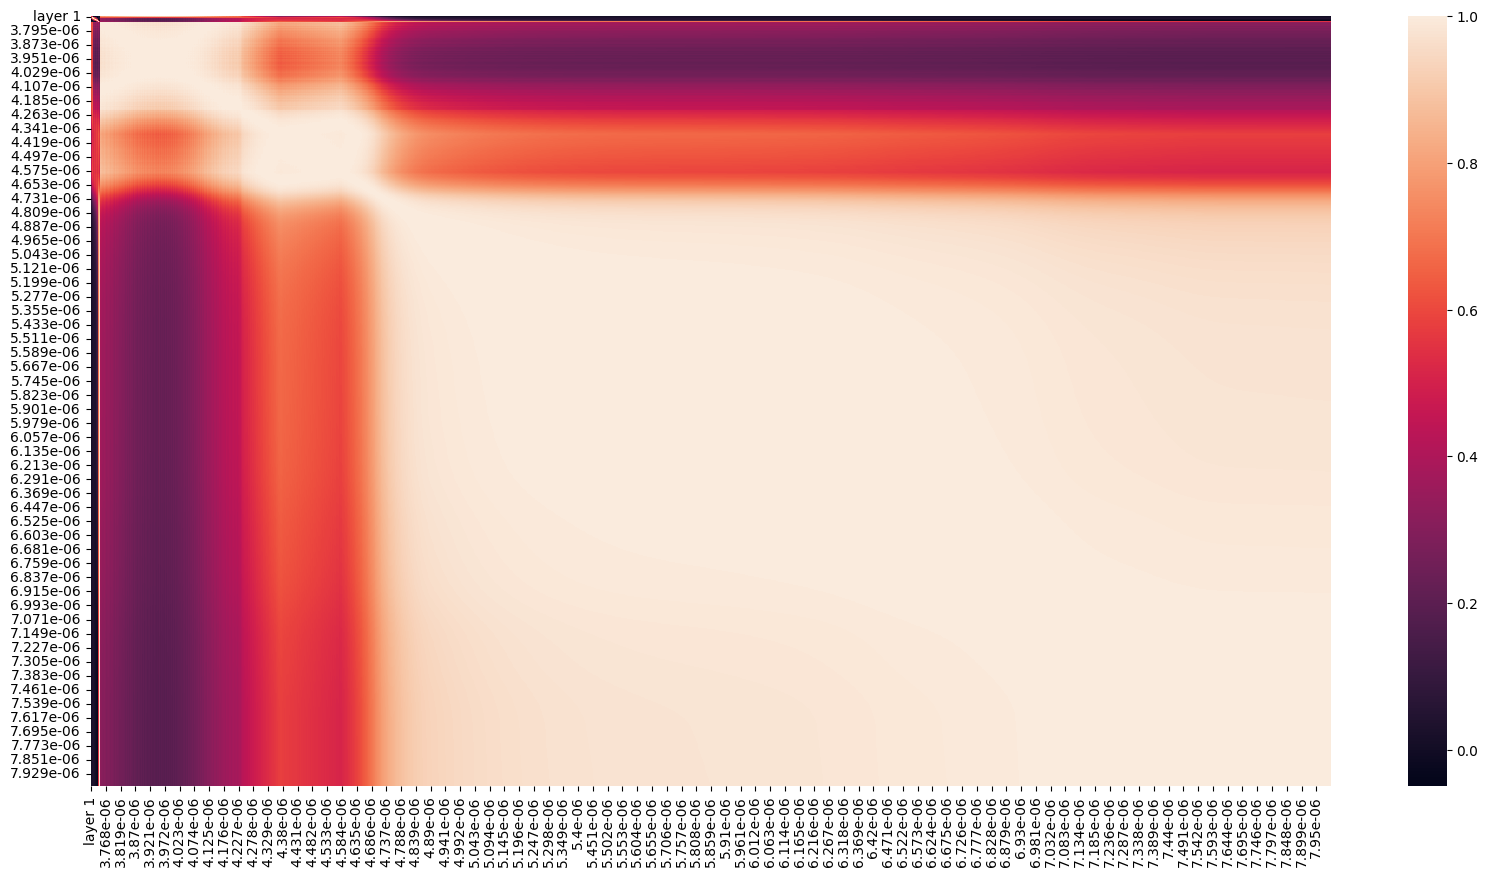

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr())

In [6]:
len(df)

2200

In [7]:
df.std() * 10**12

layer 1      2.876507e+13
layer 2      1.651462e+13
layer 3      1.279599e+13
layer 4      1.272370e+13
layer 5      1.298025e+13
                 ...     
7.986e-06    1.249644e+00
7.989e-06    1.246524e+00
7.992e-06    1.243308e+00
7.995e-06    1.240071e+00
7.998e-06    1.236958e+00
Length: 1428, dtype: float64

In [8]:
df.max()

layer 1      3.729742e+02
layer 2      3.663729e+02
layer 3      3.584903e+02
layer 4      3.576517e+02
layer 5      3.632533e+02
                 ...     
7.986e-06    5.170923e-12
7.989e-06    5.158685e-12
7.992e-06    5.146045e-12
7.995e-06    5.133313e-12
7.998e-06    5.121095e-12
Length: 1428, dtype: float64

In [9]:
max_temp = df[df.columns[:11]].values.max()

In [10]:
min_temp = df[df.columns[:11]].values.min()

In [11]:
max_temp - min_temp

99.96921479816501

In [15]:
df.iloc[:,11:].std().sum()/len(df)

3.88766689526312e-13